In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
#df_All = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-20-23 No Fluff\df_All_Avg.csv")

df_All = pd.read_csv('df_Join_all.csv')


#df_All = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\3 Final Machine Butanol\df_CDCA6.csv")


In [3]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [4]:
# df_All = df_All[df_All['Date'] > '2022-06-15 00:00:00']

In [5]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = ['Unnamed: 0', '425 SAO Al', 'Octanol PPM ', 'Hexanol PPM ',
       'Ethanol PPM ', 'Dodecanol PPM ', 'Decanol PPM ', '%nC8OH', '%nC6OH', '%nC12OH', '%nC10OH ',
                   ]

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [6]:
df_All.columns

Index(['Butanol PPM', '%Al2O3_bM', 'AYC55580', 'DI55102', 'DI55152', 'DI55580',
       'FC42428', 'FC52018', 'FC55003', 'FC55009', 'FC55102', 'FC55152',
       'FC55552', 'FC55555', 'FC55569', 'FC55576', 'FFC55553', 'FFC55555',
       'FYC55553', 'II52554', 'LC52572', 'LC55553', 'LC55555', 'LC55557',
       'LC55568', 'LC90366', 'LC90368', 'PI55004', 'PI55020', 'PI55560',
       'TC52015', 'TC55552', 'TC55553', 'TC55555', 'TC55566', 'TI40050',
       'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017',
       'TI55021', 'TI55023', 'VI52558B'],
      dtype='object')

In [7]:
# Splitting into train and test
X = df_All.drop('Butanol PPM', axis=1)  # Assuming 'target' is your target column
y = df_All['Butanol PPM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#=============================================
# TRAIN & EVALUATE REGRESSION MODEL
#=============================================

#fit simple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:            Butanol PPM   R-squared (uncentered):                   0.066
Model:                            OLS   Adj. R-squared (uncentered):              0.051
Method:                 Least Squares   F-statistic:                              4.385
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                    1.10e-19
Time:                        01:46:26   Log-Likelihood:                         -21253.
No. Observations:                2770   AIC:                                  4.259e+04
Df Residuals:                    2726   BIC:                                  4.286e+04
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:
sns.set_theme(style="ticks")
sns.pairplot(df_All)  #pairwise plot 
plt.figure(figsize=[18,12]) 
sns.heatmap(df_All.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Plot')
plt.show()

#residuals plot
for feat in X:
    fig = plt.figure(figsize=(18,12))
    fig = sm.graphics.plot_regress_exog(model, feat, fig=fig)
    # fig = plt.figure(figsize=(18,12))
    # fig = sm.graphics.plot_regress_exog(model, 'beds', fig=fig)



KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f6535104940> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

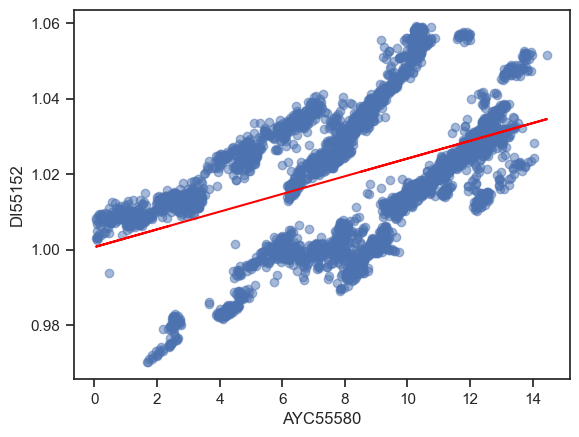

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame and it contains columns '425 %Al' and 'Butanol'
x = df_All['AYC55580']
y = df_All['DI55152']

# Scatter plot
plt.scatter(x, y, alpha=0.5)

# Fit a simple linear regression for the two variables
m, b = np.polyfit(x, y, 1)

# Add the regression line to the scatter plot
plt.plot(x, m*x + b, color='red')

# Label the axes
plt.xlabel('AYC55580')
plt.ylabel('DI55152')



# Show the plot
plt.show()


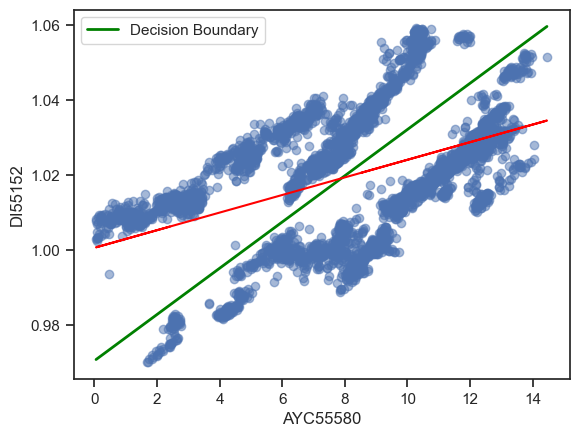

In [ ]:
# Coordinates of the two points
point1 = (1.05, 0.977)
point2 = (13.05, 1.051)

# Calculate the slope (m)
m = (point2[1] - point1[1]) / (point2[0] - point1[0])

# Calculate the y-intercept (b)
b = point1[1] - (m * point1[0])

# Now add this decision boundary to your plot
# Generate a range of x values from the minimum x in your data to the maximum x
x_values = np.linspace(min(x), max(x), 100)

# Calculate the corresponding y values from the slope and y-intercept
y_values = m * x_values + b

# Plot the decision boundary line
plt.plot(x_values, y_values, color='green', linewidth=2, label='Decision Boundary')

# Assuming 'data' is your DataFrame and it contains columns '425 %Al' and 'Butanol'
x = df_All['AYC55580']
y = df_All['DI55152']

# Scatter plot
plt.scatter(x, y, alpha=0.5)

# Fit a simple linear regression for the two variables
m, b = np.polyfit(x, y, 1)

# Add the regression line to the scatter plot
plt.plot(x, m*x + b, color='red')

# Label the axes
plt.xlabel('AYC55580')
plt.ylabel('DI55152')


# Don't forget to add a legend to explain the plot elements
plt.legend()

# Show the plot with the decision boundary
plt.show()


In [ ]:
# Calculate the slope and y-intercept of the line
point1 = (1.05, 0.977)
point2 = (13.05, 1.051)
m = (point2[1] - point1[1]) / (point2[0] - point1[0])
b = point1[1] - m * point1[0]

# Function to determine if a point is above or below the line
def classify_point(x, y, m, b):
    if y > (m * x + b):
        return 'above'
    else:
        return 'below'

# Apply the function to each point in your dataframe
df_All['position'] = df_All.apply(lambda row: classify_point(row['AYC55580'], row['DI55152'], m, b), axis=1)

# Now you can filter your dataframe based on the position relative to the line
above_line = df_All[df_All['position'] == 'above']
below_line = df_All[df_All['position'] == 'below']




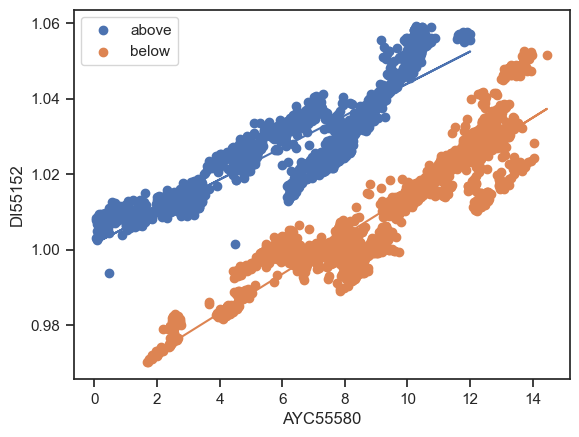

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'grouping_var' is the categorical variable causing the striations
groups = df_All.groupby('position')

# Plot each group with a different color
for name, group in groups:
    plt.scatter(group['AYC55580'], group['DI55152'], label=name)

# Optionally, add a regression line for each group
for name, group in groups:
    m, b = np.polyfit(group['AYC55580'], group['DI55152'], 1)
    plt.plot(group['AYC55580'], m*group['AYC55580'] + b)

plt.xlabel('AYC55580')
plt.ylabel('DI55152')
plt.legend()
plt.show()


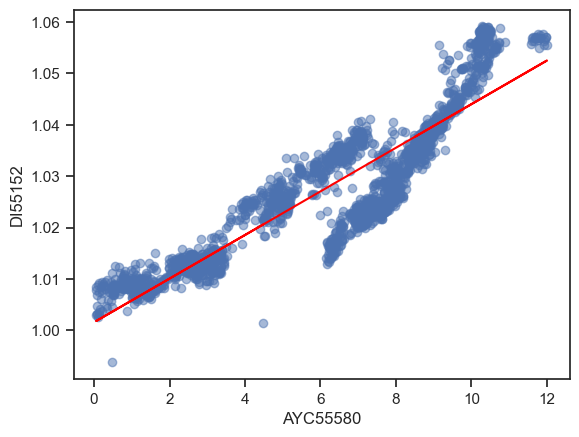

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame and it contains columns '425 %Al' and 'Butanol'
x = above_line['AYC55580']
y = above_line['DI55152']

# Scatter plot
plt.scatter(x, y, alpha=0.5)

# Fit a simple linear regression for the two variables
m, b = np.polyfit(x, y, 1)

# Add the regression line to the scatter plot
plt.plot(x, m*x + b, color='red')

# Label the axes
plt.xlabel('AYC55580')
plt.ylabel('DI55152')



# Show the plot
plt.show()

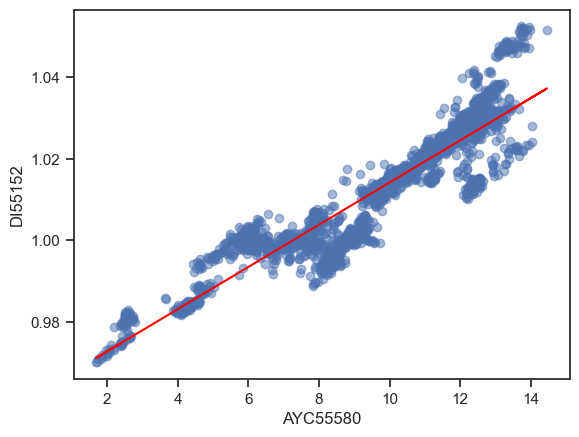

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame and it contains columns '425 %Al' and 'Butanol'
x = below_line['AYC55580']
y = below_line['DI55152']

# Scatter plot
plt.scatter(x, y, alpha=0.5)

# Fit a simple linear regression for the two variables
m, b = np.polyfit(x, y, 1)

# Add the regression line to the scatter plot
plt.plot(x, m*x + b, color='red')

# Label the axes
plt.xlabel('AYC55580')
plt.ylabel('DI55152')



# Show the plot
plt.show()

In [ ]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = ['position'
                   #'LC55555', 'FC55003', 'FFC55555'
                   ]

# Create a new DataFrame without the excluded columnsd
above_line = above_line.drop(columns=exclude_columns)

In [ ]:
# Splitting into train and test
X = above_line.drop('Butanol', axis=1)  # Assuming 'target' is your target column
y = above_line['Butanol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#=============================================
# TRAIN & EVALUATE REGRESSION MODEL
#=============================================

#fit simple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Butanol   R-squared (uncentered):                   0.409
Model:                            OLS   Adj. R-squared (uncentered):              0.407
Method:                 Least Squares   F-statistic:                              153.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):                   1.68e-244
Time:                        15:44:30   Log-Likelihood:                         -8059.0
No. Observations:                2222   AIC:                                  1.614e+04
Df Residuals:                    2212   BIC:                                  1.620e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = ['position'
                   #'LC55555', 'FC55003', 'FFC55555'
                   ]

# Create a new DataFrame without the excluded columnsd
below_line = below_line.drop(columns=exclude_columns)

In [ ]:
# Splitting into train and test
X = below_line.drop('Butanol', axis=1)  # Assuming 'target' is your target column
y = below_line['Butanol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#=============================================
# TRAIN & EVALUATE REGRESSION MODEL
#=============================================

#fit simple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Butanol   R-squared (uncentered):                   0.397
Model:                            OLS   Adj. R-squared (uncentered):              0.394
Method:                 Least Squares   F-statistic:                              166.6
Date:                Wed, 22 Nov 2023   Prob (F-statistic):                   2.15e-269
Time:                        15:45:32   Log-Likelihood:                         -8986.4
No. Observations:                2544   AIC:                                  1.799e+04
Df Residuals:                    2534   BIC:                                  1.805e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------